In [5]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-paper')
%matplotlib inline
import numpy as np

from sklearn import preprocessing
from pandas.plotting import scatter_matrix

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform

In [2]:
plt.rcParams.update(plt.rcParamsDefault)

### Preparazione del dataset

In [3]:

df = pd.read_csv("ridotto.csv")
#del df['credit_default']
del df['sex']
del df['education']
del df['status']
del df['age']
del df['ps-sep']

df.head()

,limit,ba-aug,pa-sep,credit_default
0,50000,49985,2130,0
1,200000,9981,10120,0
2,30000,29280,0,0
3,140000,41717,2000,0
4,60000,48716,1788,1


In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.iloc[:,0:3].values)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### DBScan

In [8]:
dist = pdist(X, 'euclidean')
dist = squareform(dist)

In [9]:
# Stimare il migliore eps

dist = pdist(X, 'euclidean')
dist = squareform(dist)

k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

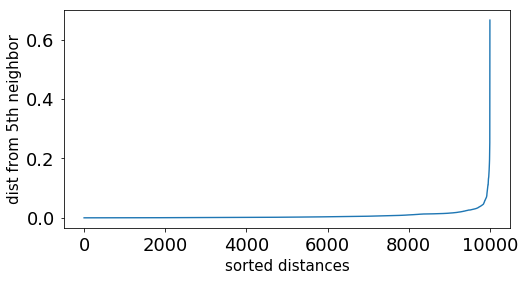

In [10]:
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [11]:

import pylab as pl
values = []
sil = []
possibleK = [5,15,50,70,100,130,160,200,240,250]

for item in possibleK:
    silh = []
    valuestemp = []
    for i in pl.frange(0.05,0.25,0.01):
        dbscan = DBSCAN(eps=i, min_samples=item)
        dbscan.fit(X)

        silh.append(silhouette_score(X, dbscan.labels_))
        valuestemp.append(i)
    sil.append(silh)
    values.append(valuestemp)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: numpy.arange
  # Remove the CWD from sys.path while we load stuff.


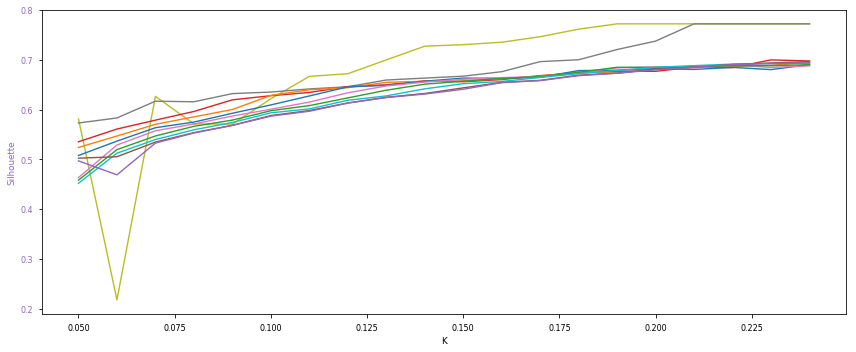

In [12]:
fig, ax1 = plt.subplots(figsize=(12, 5))
t = np.arange(0.05, 0.25, 0.01)
color = 'tab:olive'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[0][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)



t = np.arange(0.05, 0.25, 0.01)
color = 'tab:grey'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[1][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:red'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[2][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:orange'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[3][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[4][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)

t = np.arange(0.05, 0.25, 0.01)
color = 'tab:pink'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[5][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:green'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[6][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:cyan'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[7][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:brown'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[8][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:purple'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[9][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Prima prova con DBScan 

In [13]:

dbscan = DBSCAN(eps=0.225, min_samples=240)
dbscan.fit(X)

np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0]), array([  35, 9965]))

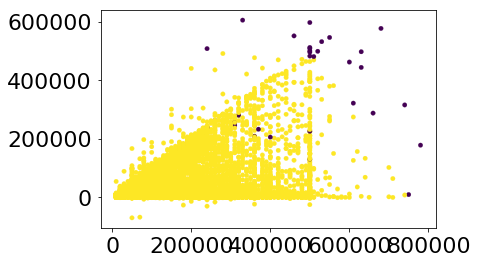

In [14]:
plt.scatter(df['limit'], df['ba-aug'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [15]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.692508417070838


### Consideriamo il cluster senza rumore e su questo eseguiamo di nuovo DBScan

In [17]:

df['Label'] = dbscan.labels_

In [18]:
tmpDF = df[df['Label']==0]

scaler = MinMaxScaler()
Y = scaler.fit_transform(tmpDF.iloc[:,0:3].values)
Y

array([[0.05479452, 0.21325978, 0.01112585],
       [0.26027397, 0.14202479, 0.05286086],
       [0.02739726, 0.17639046, 0.        ],
       ...,
       [0.10958904, 0.17538971, 0.01044681],
       [0.01369863, 0.12425166, 0.        ],
       [0.36986301, 0.58650802, 0.05238031]])

In [19]:
# Stimare il migliore eps

dist = pdist(Y, 'euclidean')
dist = squareform(dist)

k = 50
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

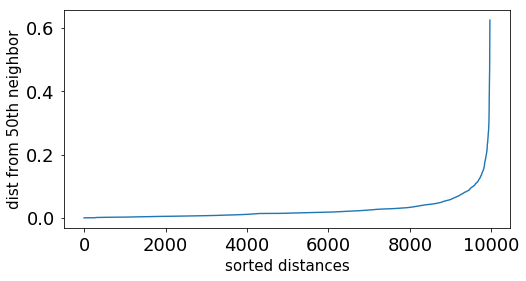

In [20]:
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [21]:

import pylab as pl
values = []
sil = []
possibleK = [85,100,130,160,200,230,260,290,350]

for item in possibleK:
    silh = []
    valuestemp = []
    for i in pl.frange(0.010,0.15,0.010):
        dbscan = DBSCAN(eps=i, min_samples=item)
        dbscan.fit(Y)
        print "k = ", item
        print "eps = ", i
        print np.unique(dbscan.labels_, return_counts=True)
        silh.append(silhouette_score(Y, dbscan.labels_))
        valuestemp.append(i)
    sil.append(silh)
    values.append(valuestemp)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: numpy.arange
  # Remove the CWD from sys.path while we load stuff.


k =  85
eps =  0.01
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([6350, 1032,  345,  104,  147,   99,  611,  107,  208,  151,  125,
         91,  159,  110,  139,   94,   93]))
k =  85
eps =  0.02
(array([-1,  0,  1,  2,  3]), array([3298, 6193,  127,  258,   89]))
k =  85
eps =  0.03
(array([-1,  0,  1]), array([2150, 7683,  132]))
k =  85
eps =  0.04
(array([-1,  0,  1]), array([1423, 8384,  158]))
k =  85
eps =  0.05
(array([-1,  0]), array([1049, 8916]))
k =  85
eps =  0.060000000000000005
(array([-1,  0]), array([ 771, 9194]))
k =  85
eps =  0.06999999999999999
(array([-1,  0]), array([ 605, 9360]))
k =  85
eps =  0.08
(array([-1,  0]), array([ 496, 9469]))
k =  85
eps =  0.09
(array([-1,  0]), array([ 399, 9566]))
k =  85
eps =  0.09999999999999999
(array([-1,  0]), array([ 329, 9636]))
k =  85
eps =  0.11
(array([-1,  0]), array([ 261, 9704]))
k =  85
eps =  0.12
(array([-1,  0]), array([ 208, 9757]))
k =  85
eps =  0.13
(array([-1,  0]), a

k =  290
eps =  0.13
(array([-1,  0]), array([ 367, 9598]))
k =  290
eps =  0.14
(array([-1,  0]), array([ 332, 9633]))
k =  290
eps =  0.15000000000000002
(array([-1,  0]), array([ 289, 9676]))
k =  350
eps =  0.01
(array([-1,  0]), array([9615,  350]))
k =  350
eps =  0.02
(array([-1,  0,  1]), array([6623, 2742,  600]))
k =  350
eps =  0.03
(array([-1,  0]), array([4352, 5613]))
k =  350
eps =  0.04
(array([-1,  0]), array([3307, 6658]))
k =  350
eps =  0.05
(array([-1,  0]), array([2262, 7703]))
k =  350
eps =  0.060000000000000005
(array([-1,  0]), array([1724, 8241]))
k =  350
eps =  0.06999999999999999
(array([-1,  0]), array([1386, 8579]))
k =  350
eps =  0.08
(array([-1,  0]), array([1154, 8811]))
k =  350
eps =  0.09
(array([-1,  0]), array([ 783, 9182]))
k =  350
eps =  0.09999999999999999
(array([-1,  0]), array([ 650, 9315]))
k =  350
eps =  0.11
(array([-1,  0]), array([ 545, 9420]))
k =  350
eps =  0.12
(array([-1,  0]), array([ 460, 9505]))
k =  350
eps =  0.13
(array([

In [22]:
dbscan = DBSCAN(eps=0.06, min_samples=200)
dbscan.fit(Y)

np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([1190, 8631,  144]))